## Data Preparation
- From the 2 dataset: review_text_data.csv and review_data_stats.csv, combine to create a new dataset which include customer reviews and recommendation. I use recommendation as a metric to consider whether a review is a positive or a negative

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
df1 = pd.read_csv('C:/Users/HP/OneDrive - National Economics University/Data Prep/Class code/review_text_data.csv')
df1 = pd.DataFrame(df1["Review"])
df1 = df1.reset_index().rename(columns={'index': 'Index'})
df1

,Index,Review
0,0,My family and I have flown mostly on British A...
1,1,This has been by far the worst service I have ...
2,2,In Nov 2022 I booked and paid for a return jou...
3,3,BA is not treating its premium economy passeng...
4,4,24 hours before our departure on BA059 to Cape...
...,...,...
3593,3593,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3594,3594,LHR to HAM. Purser addresses all club passenge...
3595,3595,My son who had worked for British Airways urge...
3596,3596,London City-New York JFK via Shannon on A318 b...


In [247]:
df2 = pd.read_csv('C:/Users/HP/OneDrive - National Economics University/Data Prep/Class code/review_stats_data.csv')
df2 = pd.DataFrame(df2["Recommended"])
df2 = df2.reset_index().rename(columns={'index': 'Index'})

In [248]:
df3 = df1.merge(df2, how='right')
df3

,Index,Review,Recommended
0,0,My family and I have flown mostly on British A...,no
1,1,This has been by far the worst service I have ...,no
2,2,In Nov 2022 I booked and paid for a return jou...,no
3,3,BA is not treating its premium economy passeng...,no
4,4,24 hours before our departure on BA059 to Cape...,no
...,...,...,...
3593,3593,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no
3594,3594,LHR to HAM. Purser addresses all club passenge...,yes
3595,3595,My son who had worked for British Airways urge...,yes
3596,3596,London City-New York JFK via Shannon on A318 b...,no


In [249]:
df3 = df3.drop("Index", axis=1)

In [250]:
df3

,Review,Recommended
0,My family and I have flown mostly on British A...,no
1,This has been by far the worst service I have ...,no
2,In Nov 2022 I booked and paid for a return jou...,no
3,BA is not treating its premium economy passeng...,no
4,24 hours before our departure on BA059 to Cape...,no
...,...,...
3593,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no
3594,LHR to HAM. Purser addresses all club passenge...,yes
3595,My son who had worked for British Airways urge...,yes
3596,London City-New York JFK via Shannon on A318 b...,no


In [251]:
positive_reviews = df3[df3["Recommended"] == 'yes']["Review"].tolist()
negative_reviews = df3[df3["Recommended"] == 'no']["Review"].tolist()

print(len(positive_reviews))
print(len(negative_reviews))


1469
2129


In [252]:
#split the train, test set
test_pos = positive_reviews[1177:]
train_pos = positive_reviews[:1177]
test_neg = negative_reviews[1177:1469]
train_neg = negative_reviews[:1177]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [253]:
# Create the numpy array of positive labels and negative labels.
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
train_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [254]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (2354, 1)
test_y.shape = (584, 1)


## Data Preprocessing
* Punctuation Removal
* Number removal
* Lowering the Text
* Tokenization i.e. split a review into words
* Stop Word Removal: Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis
* Stemming: Words are stemmed or diminished to their root/base form.  For example, ‘programmer’, ‘programming, ‘program’ are stemmed to ‘program’ 


In [255]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

In [256]:
def process_review(review):
    """
    Input:
        :review: a string
    Output:
        :reviews_clean: a list of words containing the processed reviews
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    review = review.lower()
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = re.sub('[‘’“”…]', '', review)
    review = re.sub('\n', '', review)

    # tokenize reviews
    reviews_token = word_tokenize(review)

    reviews_clean = []
    for word in reviews_token:
        if word not in stopwords_english:
            stem_word = stemmer.stem(word)
            reviews_clean.append(stem_word)

    return reviews_clean



In [257]:
print(train_x[0])
print(process_review(train_x[0]))

Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft at Heathrow. It seems like this is standard for the Berlin flights. Would use again.
['flight', 'fine', 'inlin', 'competitor', 'pleasant', 'crew', 'niggl', 'buss', 'aircraft', 'heathrow', 'seem', 'like', 'standard', 'berlin', 'flight', 'would', 'use']


In [258]:
print(test_x[0])
print(process_review(test_x[0]))

I have used British Airways over a number of years for work and leisure trips non-exclusively and must say I have noted a gradual but continued decrease in service quality. On a recent return flight from Johannesburg travelling with an infant we were delayed for over 30 hours. The way in which the delay was handled was terrible. Minimal staff meant it took three plus hours to get checked in to a hotel. Then trying to arrange the return minimising waiting time for the little one took 5 hours with two staff serving 400 passengers with no concern for customers. Tried calling head office and they were less helpful than the booking agents.My intention is to avoid where possible and in many cases they are cheaper alternatives.
['use', 'british', 'airway', 'number', 'year', 'work', 'leisur', 'trip', 'nonexclus', 'must', 'say', 'note', 'gradual', 'continu', 'decreas', 'servic', 'qualiti', 'recent', 'return', 'flight', 'johannesburg', 'travel', 'infant', 'delay', 'hour', 'way', 'delay', 'handl'

## Feature Engineering

Basically, machine models are made by mathematical formulae, hence, they can only understand numerical structures. Hence, we have to extract from our text data (reviews) specific information (<b>feature</b>) which are numerically interpretable and are linked to our goal (Sentiment Analysis). <br>
In the present Sentiment Analysis problem, we want to build a machine which is capable of reading a review and tell us whether this review has a positive or negative sentiment. <br>
   
* We build a frequency dictionary {(word, label): freq} which count the number of times (frequency) that the word is associated with the label. 
    * For example, ('happy', 1): 14 means that the word "happy" appears in positive reviews 14 times.
* Given a list of reviews, we will extract two features and store them into a matrix
    * The first feature is the number of positive words in a review.
    * The second feature is the number of negative words in a review. 

In [259]:
def build_freqs(reviews, ys):
    """ Build frequencies
    Input:
    reviews: a list of reviews
    ys: an mx1 array with the sentiment label of each review (either 0 or 1)
    Output:
    freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    yslist = np.squeeze(ys).tolist()##Remove axes of length one from a numpy darray
    # start with an empty dict and populate it by looping over all reviews
    freqs = {}
    for y, review in zip(yslist, reviews):
        for word in process_review(review):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [260]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11332


In [309]:
freqs

{('flight', 1.0): 2351,
 ('fine', 1.0): 138,
 ('inlin', 1.0): 1,
 ('competitor', 1.0): 17,
 ('pleasant', 1.0): 153,
 ('crew', 1.0): 916,
 ('niggl', 1.0): 4,
 ('buss', 1.0): 10,
 ('aircraft', 1.0): 314,
 ('heathrow', 1.0): 534,
 ('seem', 1.0): 181,
 ('like', 1.0): 240,
 ('standard', 1.0): 112,
 ('berlin', 1.0): 16,
 ('would', 1.0): 356,
 ('use', 1.0): 325,
 ('twoforon', 1.0): 1,
 ('review', 1.0): 82,
 ('cover', 1.0): 13,
 ('economi', 1.0): 459,
 ('busi', 1.0): 439,
 ('class', 1.0): 456,
 ('ba', 1.0): 1169,
 ('london', 1.0): 675,
 ('citi', 1.0): 41,
 ('ibiza', 1.0): 5,
 ('excel', 1.0): 351,
 ('light', 1.0): 53,
 ('lunch', 1.0): 53,
 ('small', 1.0): 158,
 ('cheeseandpastrami', 1.0): 1,
 ('sandwich', 1.0): 103,
 ('chocol', 1.0): 24,
 ('browni', 1.0): 2,
 ('follow', 1.0): 55,
 ('pretti', 1.0): 104,
 ('much', 1.0): 227,
 ('freeflow', 1.0): 1,
 ('drink', 1.0): 483,
 ('trolley', 1.0): 26,
 ('full', 1.0): 225,
 ('work', 1.0): 156,
 ('hard', 1.0): 56,
 ('good', 1.0): 1123,
 ('job', 1.0): 51,
 ('

## Feature extraction

Implement extract_features function:
* This function takes in a single review.
* Process the review using `process_review` function and save the list of review words.
* Loop through each word in the list of processed words
    * For each word, check the 'freqs' dictionary for the count when that word has a positive '1' label. (value associated with the key (word, 1.0))
    * Do the same for the count for when the word is associated with the negative label '0'. (value associated with the key (word, 0.0).)

In [262]:
def extract_features(review, freqs, process_review=process_review):
    '''
    Input: 
        review: a list of words for one review
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_review tokenizes, stems, and removes stopwords
    word_l = process_review(review)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        if (word, 1) in freqs.keys():
            x[0,1] += freqs[(word, 1)]
        
        # increment the word count for the negative label 0
        if (word, 0) in freqs.keys():
            x[0,2] += freqs[(word, 0)]
        
    assert(x.shape == (1, 3))
    return x

## Logistic Regression


In [263]:
# Sigmoid function
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    ''' 
    h = 1. / (1. + np.exp(-z))
    return h

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

#### Regression (logit)
$$z = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n$$
In this case $n$ is equal to $2$.

#### The prediction
$$ y_{\text{pred}} = \sigma(z) = \frac{1}{1+\exp^{-z}}$$

#### Binary log-loss function
$$J(w) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (y_{\text{pred}}^{(i)}) + (1-y^{(i)})\log (1-y_{\text{pred}}^{(i)})$$
* $w = (w_0, w_1, w_2)$ is model parameters
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of training example 'i'.
* $h(z^{(i)})$ is the model's prediction for the training example 'i'.

The goal of a training process is to minimize the loss function $J(w)$ on the training set.


Compute the gradient
$$\dfrac{\partial J}{\partial w_j} (w) = \frac{1}{m} \sum_{i=1}^m(y_{\text{pred}}^{(i)}-y^{(i)})x^{(i)}_j$$
Update the weights $w$
$$w_j = w_j - \alpha \dfrac{\partial J}{\partial w_j} (w)$$

#### Vectorized formula and implementation
* $w$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $w_0$
* The 'logits', 'z', are calculated by multiplying the feature matrix $X$ with the weight vector $w$.  $z = Xw$
    * $X$ has dimensions (m, n+1) 
    * $w$: has dimensions (n+1, 1)
    * $z$: has dimensions (m, 1)
* The prediction $y_{\text{pred}}$, is calculated by applying the sigmoid to $z$, and has dimensions (m,1).
* The cost function $J$ in its vector form
$$J = -\frac{1}{m} \times \left(y^T \cdot log(y_{\text{pred}}) + (1-y)^T \cdot log(1 - y_{\text{pred}}) \right)$$
* The update of $w$ is also vectorized
$$w = w - \frac{\alpha}{m} \times \left( X^T \cdot \left(y_{\text{pred}} - y\right) \right)$$



In [298]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    
    # get 'm', the number of rows in matrix X
    m = len(x)
    thetas = [theta]
    Js = []
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, thetas[-1])
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = - (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) / float(m)
        Js.append(J)
        
        theta = thetas[-1] - (alpha * np.dot(x.T, (h-y))) / float(m)
        
        # Stopping criteria
        if np.linalg.norm(theta - thetas[-1]) < 1e-9:
            break
        thetas.append(theta)
        

    J = float(J)
    return J, thetas[-1], Js

## Model training
* Stack the features for all training examples into a matrix X. 
* Call gradientDescent function.

In [299]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta, Js = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 2000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.44674229.
The resulting vector of weights is [2e-08, 0.00046008, -0.00042312]


C:\Users\HP\AppData\Local\Temp\ipykernel_8784\1282230516.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


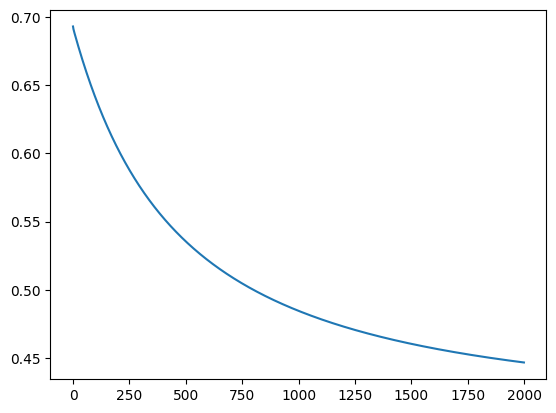

In [307]:
plt.plot(np.squeeze(Js))
plt.show()

#### Write a function to predict whether a review is positive or negative.
* Given a review, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = \sigma(X \cdot \theta)$$

In [285]:
# UNQ_C4 GRADED FUNCTION: predict_review
def predict_review(review, freqs, theta):
    '''
    Input: 
        review: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a review being positive or negative
    '''
    # extract the features of the review and store it into x
    x = extract_features(review, freqs)
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

## Determine the model precision 
* Use your 'predict_review' function to make predictions on each review in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0. 0.5 plays a role of the decision threshold here.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by $n$.


In [286]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_review=predict_review):
    """
    Input: 
        test_x: a list of reviews
        test_y: (m, 1) vector with the corresponding labels for the list of reviews
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of reviews classified correctly) / (total # of reviews)
    """   
    # the list for storing predictions
    y_hat = []
    
    for rv in test_x:
        # get the label prediction for the review
        y_pred = predict_review(rv, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = np.sum(y_hat == np.squeeze(test_y)) / len(test_y)    
    return accuracy

In [297]:
# Accuracy on train set
accuracy = test_logistic_regression(train_x, train_y, freqs, theta)
print(f"Logistic regression model's accuracy on training dataset = {accuracy:.4f}")
# Accuracy on test set
accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy on testing dataset = {accuracy:.4f}")

Logistic regression model's accuracy on training dataset = 0.8246
Logistic regression model's accuracy on testing dataset = 0.7483


In [310]:
# Test results
my_rv = """An excellent flight in Club World on British Airways. The welcome aboard was warm and that continued throughout the flight. The crew were attentive, 
        friendly and very professional. On board food for dinner and breakfast was good and there was a well chosen selection of wines. 
        In flight entertainment offered a great selection of films and audio. The seat/flat bed was very comfortable - British Airways have done an excellent job in the design 
        and comfort of the suites on board the A350. I liked the sleek, minimalist design. This flight showed that BA can be among the worldâ€™s best airlines.
        """
print(process_review(my_rv))
y_hat = predict_review(my_rv, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['excel', 'flight', 'club', 'world', 'british', 'airway', 'welcom', 'aboard', 'warm', 'continu', 'throughout', 'flight', 'crew', 'attent', 'friendli', 'profession', 'board', 'food', 'dinner', 'breakfast', 'good', 'well', 'chosen', 'select', 'wine', 'flight', 'entertain', 'offer', 'great', 'select', 'film', 'audio', 'seatflat', 'bed', 'comfort', 'british', 'airway', 'done', 'excel', 'job', 'design', 'comfort', 'suit', 'board', 'like', 'sleek', 'minimalist', 'design', 'flight', 'show', 'ba', 'among', 'worldâ€™', 'best', 'airlin']
[[0.87577085]]
Positive sentiment
